## SVD(Singular Value Decomposition)

### SVD 개요

`SVD` 역시 `PCA`와 유사한 행렬 분해 기법을 이용한다.

PCA의 경우 정방행렬(즉, 행과 열의 크기가 같은 행렬)만을 고유백터로 분해할 수 있지만,

SVD는 정방행렬 뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있다.

일반적으로 SVD는 m X n 크기의 행렬 A를 분해하는 것을 의미한다.

`SVD`는 특이값 분해로 불리며, 행렬 U와 V에 속한 벡터는 특이벡터(singular vector)이며, 모든 특이벡터는 서로 직교하는 성질을 가진다.



In [1]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4X4의 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]



a 행렬에 SVD를 적용해 U, Sigma, Vt를 도출한다.

SVD 분해는 numpy.linalg.svd에 파라미터로 원본 행렬을 입력하면 U행렬, Sigma 행렬, V전치 행렬을 반환한다.



In [2]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


U 행렬이 4X4, Vt 행렬이 4X4 로 반환됐고, Sigma의 경우는 1차원 행렬인 (4, )로 반환되었다.

분해된 이 U, Sigma, Vt를 이용해 다시 원본 행렬로 정확히 복원되는지를 확인한다.



In [3]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print('1. a_ 행렬\n {0}\n'.format(np.round(a_, 3)))

print('2. a 행렬\n {0}'.format(np.round(a, 3)))

1. a_ 행렬
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]

2. a 행렬
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


U, Sigma, Vt를 이용해 a_는 원본 행렬 a와 동일하게 복원됨을 알 수 있다.

데이터 세트가 로우 간 의존성이 있을 경우 어떻게 Sigma 값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아본다.

의존성을 부여하기 위해 a 행렬의 3번째 로우를 '첫 번째 로우 + 두 번째 로우'로 업데이트 하고, 4번째 로우는 첫 번째 로우와 같다고 업데이트한다.


In [4]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [5]:
# 다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [6]:
# U 행렬의 경우는 Sigma 와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [7]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

In [8]:
# 원본 행렬을 출력하고 SVD를 적용할 경우, U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n행렬 분해 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 SIgma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma 값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of Truncated SVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

행렬 분해 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma 값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231

In [9]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'TruncatedSVD Component 2')

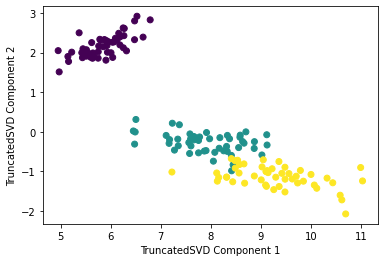

In [10]:
iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

In [22]:
# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.fit_transform(iris_scaled)

In [23]:
# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

Text(0.5, 1.0, 'PCA Transformed')

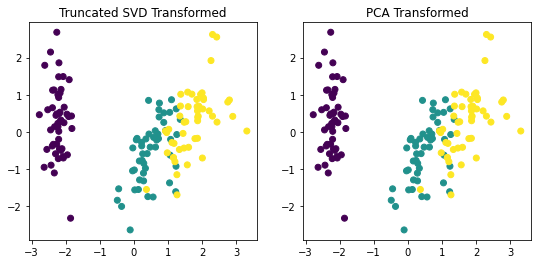

In [24]:
# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

두 개의 변환 행렬 값과 원복 속성별 컴포넌트 비율값을 실제로 서로 비교해 보면 거의 같음을 알 수 있다.


In [25]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.320689936515426e-15
6.245004513516506e-17


모두 0에 가까운 값이므로 2개의 변환이 서로 동일함을 알 수 있다.

즉, *데이터 세트가 스케일링으로 데이터 중심이 동일해지면* 사이킷런의 `SVD`와 `PCA`는 동일한 변환을 수행한다.

> 이는 `PCA`가 `SVD` 알고리즘으로 구현됐음을 의미한다.

하지만 PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하며 SVD는 희소행렬(Sparse Matrix)에 대한 변환도 가능하다.

